In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pandas as pd
df = pd.read_csv('abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.describe()

,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [17]:
features  = df[[
    "Length",
    "Diameter",
    "Height",
    "Whole",
    "Shucked",
    "Viscera",
    "Shell",
    "I",
    "M",
    "F"
]]

label = df["Rings"]

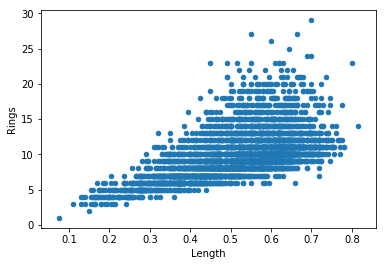

In [10]:
df.plot(x='Length', y='Rings', kind='scatter')
plt.show()

In [11]:
dummies = pd.get_dummies(df['Sex']);
for dummy_col in dummies.columns:
    df[dummy_col] = dummies[dummy_col]

In [12]:
df.head()

,Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings,F,I,M
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [22]:
df=df.drop(['Sex'], axis=1)

In [23]:
from sklearn.linear_model import ElasticNet
from sklearn.feature_selection import SelectFromModel

model = ElasticNet()
esfm = SelectFromModel(model)
esfm.fit(features, label)
print(list(features.iloc[:, esfm.get_support(indices=True)])

['Whole', 'I']


In [24]:
df.head()

,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings,F,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [40]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(df, df['Rings'])

In [32]:
print(X_test)

      Length  Diameter  Height   Whole  Shucked  Viscera   Shell  Rings  F  I  \
738    0.535     0.410   0.135  0.8620   0.2855   0.1525  0.3200     14  0  0   
2108   0.665     0.535   0.225  2.1835   0.7535   0.3910  0.8850     27  0  0   
1284   0.500     0.410   0.140  0.6615   0.2585   0.1625  0.1960      9  0  1   
2588   0.570     0.435   0.140  0.8585   0.3905   0.1960  0.2295      8  1  0   
3558   0.550     0.425   0.155  0.8725   0.4120   0.1870  0.2425     10  0  1   
1671   0.610     0.470   0.160  1.0220   0.4490   0.2345  0.2945      9  0  0   
2352   0.700     0.530   0.190  1.3185   0.5480   0.2330  0.4200     18  0  0   
2986   0.535     0.405   0.175  1.2705   0.5480   0.3265  0.3370     13  0  0   
3073   0.665     0.525   0.155  1.3575   0.5325   0.3045  0.4485     10  0  0   
67     0.595     0.495   0.185  1.2850   0.4160   0.2240  0.4850     13  1  0   
1834   0.410     0.315   0.095  0.2805   0.1140   0.0345  0.1100      7  0  1   
88     0.460     0.355   0.1

In [33]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
print(regr.coef_)

[ 3.12205986e-15 -3.79614604e-15  1.71384050e-16  1.03938602e-14
 -1.98454022e-14 -1.09766582e-14  4.86417240e-15  1.00000000e+00
  1.09650444e-17  1.35340853e-17 -2.44991297e-17]


In [37]:
print(mean_squared_error(y_test, regr.predict(X_test)))

7.00463190387155e-30


In [39]:
print(regr.score(X_test, y_test))

1.0
